In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreatorsLab/toxic_comment/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreatorsLab/toxic_comment/test.csv')
val_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreatorsLab/toxic_comment/validation.csv')

In [4]:
print(train_data.shape,test_data.shape,val_data.shape)

(120000, 2) (20000, 2) (20000, 2)


In [3]:
df = pd.concat([train_data,test_data,val_data],axis=0)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,comment_text,toxic
0,Lucky? I will prove that you are wrong. This a...,0
1,"""\n\nI've relabeled it the """"Current version""""...",0
2,Maroon 5]]- [[Never Gonna Leave This Bed,0
3,Because Murky and all the rest are cowards and...,1
4,I love dumb criminals.,1


In [6]:
df.isnull().sum()

comment_text    0
toxic           0
dtype: int64

In [25]:
df[df.duplicated()]

,comment_text,toxic
3883,You can't fix stupid.,1
5222,You're an idiot.,1
6786,Stupid is as stupid does.,1
6900,Please for the love of GOD! STOP WAKING ME UP ...,1
7510,You're an idiot.,1
...,...,...
159325,Dumb.,1
159458,You're an ass.,1
159629,Trump's awfulness is so apparent it feels poin...,1
159765,Stupid question.,1


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
len(df[df.duplicated()])

0

In [10]:
df.shape

(159251, 2)

In [28]:
df['toxic'].value_counts()

0    80000
1    79251
Name: toxic, dtype: int64

In [12]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=c3ab21dd0ff985b42859d1c5e91139ffc23c1b31f07f70b64b362af76546e378
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [13]:
import wget
wget.download("https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py",out="helper_prabowo_ml.py")

'helper_prabowo_ml.py'

In [6]:
import nltk
from nltk.util import pr
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from helper_prabowo_ml import clean_html, remove_links, remove_special_characters, removeStopWords, remove_, remove_digits, lower, email_address, non_ascii, punct, hashtags

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def text_preprocess(data,col):
    data[col] = data[col].apply(func=clean_html)
    data[col] = data[col].apply(func=remove_)
    data[col] = data[col].apply(func=removeStopWords)
    data[col] = data[col].apply(func=remove_digits)
    data[col] = data[col].apply(func=remove_links)
    data[col] = data[col].apply(func=remove_special_characters)
    data[col] = data[col].apply(func=punct)
    data[col] = data[col].apply(func=non_ascii)
    data[col] = data[col].apply(func=email_address)
    data[col] = data[col].apply(func=lower)
    return data

In [8]:
df = text_preprocess(df,'comment_text')
df.head()

,comment_text,toxic
0,lucky prove wrong artist targeted do listen th...,0
1,i ve relabeled current version sorry associati...,0
2,maroon never gonna leave bed,0
3,because murky rest cowards liars you mabry non...,1
4,ove dumb criminals,1


In [9]:
df['total_words'] = df['comment_text'].apply(len)
df.head()

,comment_text,toxic,total_words
0,lucky prove wrong artist targeted do listen th...,0,277
1,i ve relabeled current version sorry associati...,0,98
2,maroon never gonna leave bed,0,28
3,because murky rest cowards liars you mabry non...,1,108
4,ove dumb criminals,1,18


In [18]:
lemmatizer=WordNetLemmatizer()
def lemmatizing(df):
    tweet=[lemmatizer.lemmatize(word) for word in df]
    return tweet

In [19]:
nltk.download('wordnet')
df['comment_text'] = df['comment_text'].apply(lambda x: lemmatizing(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [32]:
df.head()

,comment_text,toxic,total_words
0,your last blocks accomplished rather nicely co...,0,93
1,next time shoot,1,15
2,fucck u ahole wateva u want diick head contact...,1,53
3,the despicable thugs not quite,1,30
4,you mind man most links everything xdcc topic ...,0,235


In [10]:
# TF-IDF Trigram

vect=TfidfVectorizer(ngram_range=(1,3)).fit(df['comment_text'])
feature_names=vect.get_feature_names_out()
print("Number of features: {}\n", format(len(feature_names)))
print("First 100 features: \n", format(feature_names[:100]))

Number of features: {}
 6675043
First 100 features: 
 ['aa' 'aa aat' 'aa aat defined' 'aa acupuncture'
 'aa acupuncture analgesia' 'aa again' 'aa again better' 'aa another'
 'aa another alt' 'aa another childish' 'aa another hate'
 'aa another ignorant' 'aa another jealous' 'aa another left'
 'aa another liberal' 'aa another lunatic' 'aa another post' 'aa arena'
 'aa arena if' 'aa article' 'aa article would' 'aa baltimore'
 'aa baltimore areas' 'aa bs' 'aa bs put' 'aa canadian' 'aa canadian we'
 'aa chris' 'aa chris paid' 'aa community' 'aa community looking'
 'aa community shown' 'aa crazed' 'aa crazed monkey' 'aa cum'
 'aa cum leam' 'aa damaged' 'aa damaged sam' 'aa dog' 'aa dog suppose'
 'aa economy' 'aa economy expanding' 'aa edits' 'aa edits enthusiastic'
 'aa ee' 'aa ee ii' 'aa ended' 'aa ended deleting' 'aa except'
 'aa except comes' 'aa family' 'aa family lies' 'aa filter'
 'aa filter kind' 'aa flt' 'aa flt one' 'aa friend' 'aa friend dr'
 'aa giving' 'aa giving sound' 'aa grou

In [26]:
X = df['comment_text']
y = df['toxic']
X = vect.transform(X)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(127400, 6675043) (31851, 6675043) (127400,) (31851,)


In [28]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Logreg = LogisticRegression()
logreg_model = Logreg.fit(X_train,y_train)
y_train_pred = logreg_model.predict(X_train)
y_test_pred = logreg_model.predict(X_test)

logistic_train_accuracy = accuracy_score(y_train, y_train_pred)
logistic_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {logistic_train_accuracy}')
print(f'Test Accuracy: {logistic_test_accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.9619466248037677
Test Accuracy: 0.9180559480079118


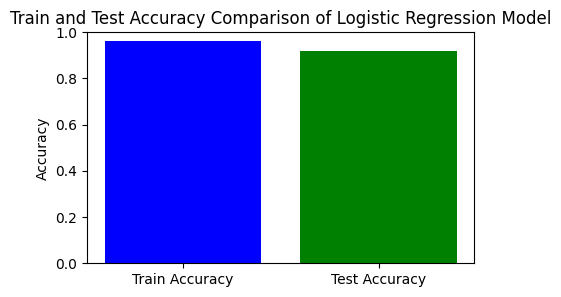

In [29]:
labels = ['Train Accuracy', 'Test Accuracy']
accuracy_values = [logistic_train_accuracy, logistic_test_accuracy]

plt.figure(figsize=(5, 3))
plt.bar(labels, accuracy_values, color=['blue', 'green'])
plt.ylim(0.0, 1.0)
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy Comparison of Logistic Regression Model')
plt.show()

In [30]:
# Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2

k_best = 1000
chi2_selector = SelectKBest(chi2, k=k_best)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_test_chi2 = chi2_selector.transform(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train_chi2, y_train)

y_train_pred = nb_model.predict(X_train_chi2)
y_test_pred = nb_model.predict(X_test_chi2)

nb_train_accuracy = accuracy_score(y_train, y_train_pred)
nb_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {nb_train_accuracy}')
print(f'Test Accuracy: {nb_test_accuracy}')

Train Accuracy: 0.8968210361067503
Test Accuracy: 0.8961100122445135


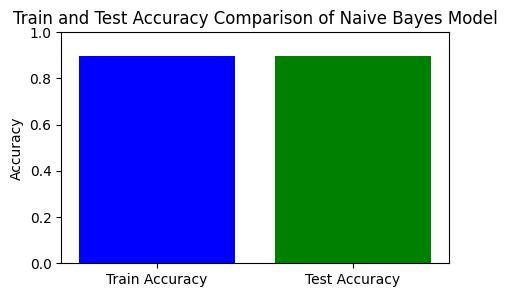

In [31]:
labels = ['Train Accuracy', 'Test Accuracy']
accuracy_values = [nb_train_accuracy, nb_test_accuracy]

plt.figure(figsize=(5, 3))
plt.bar(labels, accuracy_values, color=['blue', 'green'])
plt.ylim(0.0, 1.0)
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy Comparison of Naive Bayes Model')
plt.show()

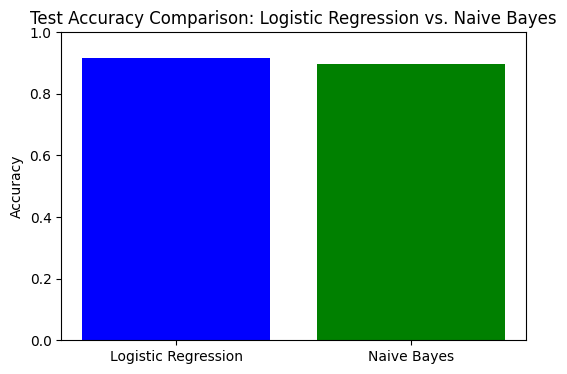

In [32]:
models = ['Logistic Regression', 'Naive Bayes']
accuracy_values = [logistic_test_accuracy, nb_test_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracy_values, color=['blue', 'green'])
plt.ylim(0.0, 1.0)
plt.ylabel('Accuracy')
plt.title('Test Accuracy Comparison: Logistic Regression vs. Naive Bayes')
plt.show()

In [33]:
import joblib
model_path = '/content/drive/My Drive/Colab Notebooks/CreatorsLab/toxic_comment/model/logistic_regression_model.pkl'
loaded_model = joblib.load(model_path)

In [36]:
random_indices = np.random.choice(X_test.shape[0], size=5, replace=False)
random_samples = X_test[random_indices].toarray()
predictions = loaded_model.predict(random_samples)

In [37]:
predicted_labels = ['Toxic' if prediction == 1 else 'Not Toxic' for prediction in predictions]
for i in range(5):
    sample_index = random_indices[i]
    sample_text = df.iloc[sample_index]['comment_text']
    actual_label = 'Toxic' if y_test.iloc[sample_index] == 1 else 'Not Toxic'
    predicted_label = predicted_labels[i]

    print(f"Sample {i + 1}:")
    print("Text:", sample_text)
    print(f"Actual Label: {actual_label}, Predicted Label: {predicted_label}")
    print()

Sample 1:
Text: kenney supports corrupted catholics therefore incapable unite albertans religions used politicians divide societies
Actual Label: Toxic, Predicted Label: Toxic

Sample 2:
Text: the stupid administration vandals ever unblocking punish teachers childs years old avoid vandalizations incomptence resolve problems abuse admin bye bye thanks waste time wikipedia wikipedia owned admins lack life want exercise authority virtually
Actual Label: Not Toxic, Predicted Label: Not Toxic

Sample 3:
Text: i removed it per wp seealso linked article go see also section since added content article wikilinked longer belonged see also
Actual Label: Not Toxic, Predicted Label: Not Toxic

Sample 4:
Text: considering sources backing lies i m suprised can t read embarrassing promise anything illiterate hurry up get panties bit knotted waste time blocked
Actual Label: Toxic, Predicted Label: Toxic

Sample 5:
Text: not all i m much sharp buy dem repub garbage also stupid enough believe iraq global